In [24]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from google.colab import drive

drive.mount('drive')

haarcascade_frontalface_alt2 = cv2.CascadeClassifier("/content/drive/MyDrive/RM/haarcascade_frontalface_alt2.xml")
loadModel = load_model("/content/drive/MyDrive/RM/mask_recog.h5")

def face_mask_detector(frame):
  #frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = haarcascade_frontalface_alt2.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (a, b, c, d) in faces:
      face_frame = frame[b:b+d,a:a+c]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = loadModel.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (a, b- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (a, b), (a + c, b + d),color, 3)
  # cv2_imshow(frame)
  return frame

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


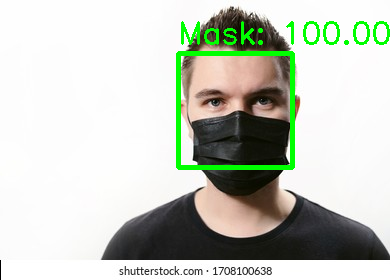

In [25]:
input_image = cv2.imread("/content/drive/MyDrive/RM/ex1.jpeg")
output = face_mask_detector(input_image)
cv2_imshow(output)

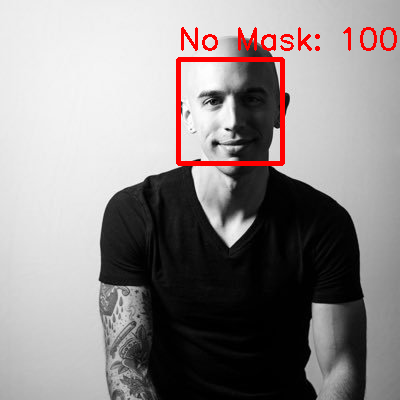

In [26]:
input_image = cv2.imread("/content/drive/MyDrive/RM/example_02.png")
output = face_mask_detector(input_image)
cv2_imshow(output)